<a href="https://colab.research.google.com/github/kopapatzimos/Iris-Dataset---Clustering---KMeans/blob/main/iris_dataset_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Load the iris dataset
data = load_iris()

# Create a DataFrame with feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first five rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


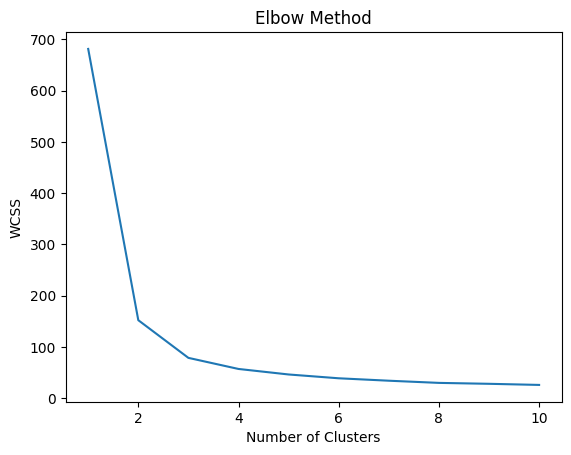

In [3]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data.data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

From the previous plot, we can inference that the optimal number of clusters is 3. So, the following code snippet applies the KMeans clustering algorithm to the iris dataset with k=3 clusters, using the KMeans class from sklearn.cluster.

In [5]:
# Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(data.data)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Finally, we create a scatter plot of the iris dataset, where the data points are colored according to their cluster assignments based on the KMeans clustering algorithm.



The code assigns the iris feature data (data.data) to a variable X. The plt.scatter() function is called four times to plot the data points. The first three calls plot the data points for each of the three clusters with a different color (red, blue and green) and a label indicating the cluster number.



The fourth plt.scatter() call plots the centroid points for each of the three clusters using the kmeans.cluster_centers_ attribute. The centroid points are plotted in black, with a marker size of 80 (s=80), and labeled as "Centroids".



The resulting plot shows the clusters and their centroid points in different colors and sizes. The plot can help to visualize how well the KMeans algorithm has clustered the data points and how distinct the clusters are from each other.

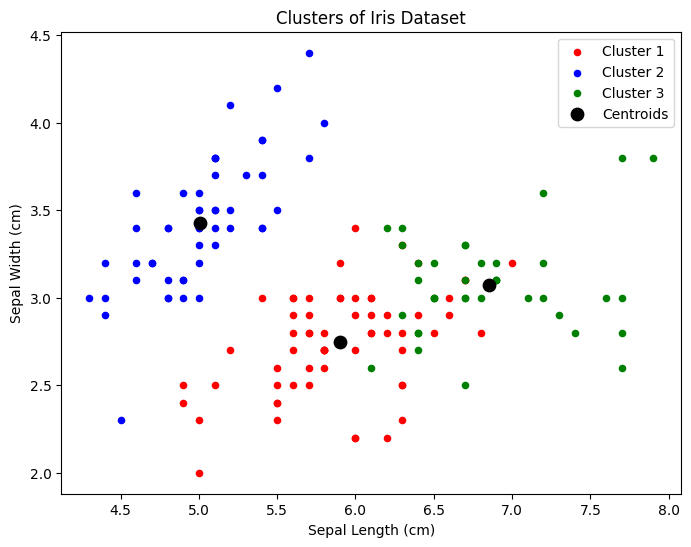

In [6]:
X = data.data

# Plot the results
plt.figure(figsize=(8, 6))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=20, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=20, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=20, c="green", label="Cluster 3")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=80, c="black", label="Centroids")
plt.title("Clusters of Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.show()